<a href="https://colab.research.google.com/github/Edna-soso/DataAnalysis_Project/blob/main/Model/K_Mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import plotly.express as px
import seaborn as sns
import numpy as np
import pandas as pd
from google.colab import files
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [4]:
RFM_data = pd.read_csv('/content/drive/MyDrive/python_OP/RFM_data.csv', encoding = 'unicode_escape')

In [5]:
def right_treat(var):
    if var <= 0:
        return 1
    else:
        return var

# Describing the data
RFM_data.describe()

,Unnamed: 0,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Group,RFM_Score
count,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000
mean,2119.000000,15289.066761,91.692852,93.543760,1964.023094,2.495164,2.506487,2.500118,277.081387,7.501769
std,1223.838225,1718.757878,99.688631,230.625413,8335.006464,1.118050,1.117619,1.118271,118.018310,2.816126
min,0.000000,12347.000000,0.000000,2.000000,2.900000,1.000000,1.000000,1.000000,111.000000,3.000000
25%,1059.500000,13810.500000,17.000000,18.000000,308.840000,1.000000,2.000000,1.500000,144.000000,5.000000
50%,2119.000000,15279.000000,50.000000,42.000000,674.520000,2.000000,3.000000,3.000000,244.000000,8.000000
75%,3178.500000,16767.500000,141.000000,102.000000,1628.620000,3.000000,4.000000,3.500000,344.000000,10.000000
max,4238.000000,18287.000000,373.000000,7840.000000,270287.500000,4.000000,4.000000,4.000000,444.000000,12.000000


In [6]:
#Applying on the data.
RFM_data['Recency'] = RFM_data['Recency'].apply(lambda x : right_treat(x))
RFM_data['Monetary'] = RFM_data['Monetary'].apply(lambda x : right_treat(x))

#Checking the Skewness of R, F and M
print('Recency Skewness : ' + RFM_data['Recency'].skew().astype(str))
print('Frequency Skewness : ' + RFM_data['Frequency'].skew().astype(str))
print('Monetary Skewness : ' + RFM_data['Monetary'].skew().astype(str))

Recency Skewness : 1.2578896378884323
Frequency Skewness : 17.977687113494753
Monetary Skewness : 20.65739322066744


In [7]:
log_RFM_data = RFM_data[['Recency','Frequency','Monetary']].apply(np.log,axis = 1).round(4)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



,Recency,Frequency,Monetary
count,4239.000000,4239.000000,4239.000000
mean,3.737734,3.750115,6.597104
std,1.468903,1.241810,1.232680
min,0.000000,0.693100,1.064700
25%,2.833200,2.890400,5.732800
50%,3.912000,3.737700,6.514000
75%,4.948800,4.625000,7.395500
max,5.921600,8.967000,12.507200


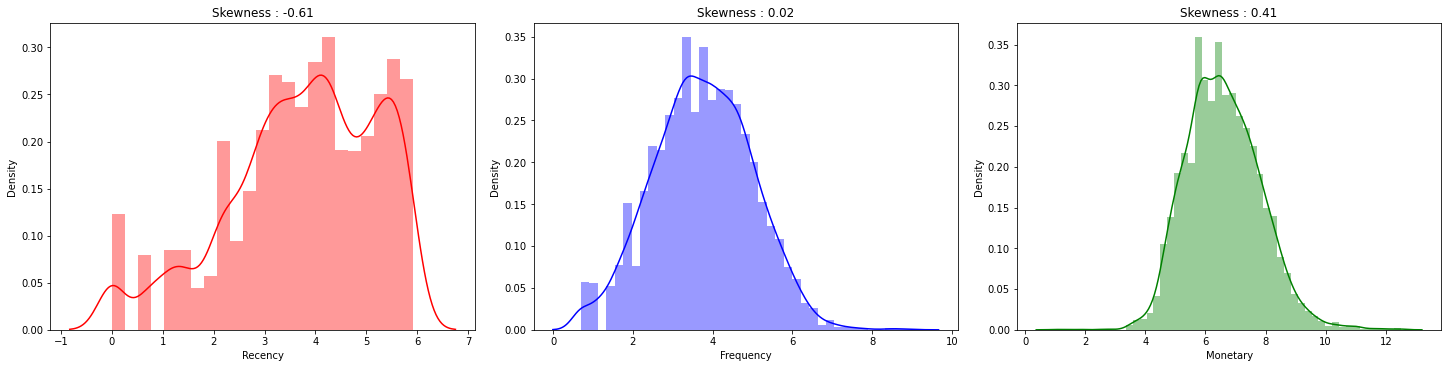

In [8]:
#Plot after transformation for the distributions :
i = 0
fig = plt.figure(constrained_layout = True,figsize = (20,5))
gs = GridSpec(1, 3, figure=fig)    

col = ['red','blue','green']
for var in list(log_RFM_data.columns[0:3]):
    plt.subplot(gs[0,i])
    sns.distplot(log_RFM_data[var],color= col[i])
    plt.title('Skewness ' + ': ' + round(log_RFM_data[var].skew(),2).astype(str))
    i= i+1
log_RFM_data.describe()

In [9]:
#Scaling the data


ss = StandardScaler()
Scaled_RFM_data = ss.fit_transform(log_RFM_data)
Scaled_RFM_data = pd.DataFrame(Scaled_RFM_data,columns=log_RFM_data.columns,index=log_RFM_data.index)

In [10]:
# Will search the optimal number of cluster based on the Elbow Method as below:
SS_distance = {}
for k in range(1,20):
    mod = KMeans(n_clusters= k, max_iter=1000,init = 'k-means++')
    mod = mod.fit(Scaled_RFM_data)
    SS_distance[k] = mod.inertia_

Text(0.5, 1.0, 'Elbow Techinque to find the optimal cluster size')

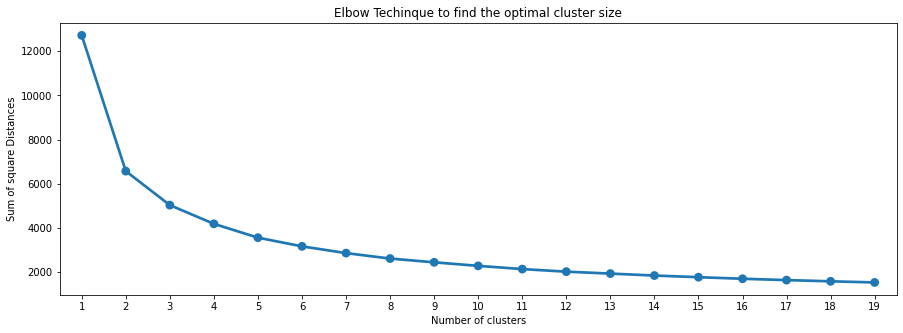

In [11]:
#Plotting the sum of square distance values and numbers of clusters
plt.figure(figsize = (15,5))
sns.pointplot(x = list(SS_distance.keys()), y = list(SS_distance.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Sum of square Distances")
plt.title("Elbow Techinque to find the optimal cluster size")

In [12]:
KM_clust = KMeans(n_clusters= 3, init = 'k-means++',max_iter = 1000)
KM_clust.fit(Scaled_RFM_data)

RFM_data['Cluster'] = KM_clust.labels_
RFM_data['Cluster'] = 'Cluster' + RFM_data['Cluster'].astype(str)
RFM_data.head()

,Unnamed: 0,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Group,RFM_Score,RFM_Loyality_level,Cluster
0,0,12347.0,2,182,4310.00,1,1,1,111,3,True Lover,Cluster0
1,1,12348.0,75,31,1797.24,3,3,1,331,7,Flirting,Cluster1
2,2,12349.0,18,73,1757.55,2,2,1,221,5,True Lover,Cluster1
3,3,12350.0,310,17,334.40,4,4,3,443,11,Platonic Friend,Cluster2
4,4,12352.0,36,85,2506.04,2,2,1,221,5,True Lover,Cluster1


In [13]:
RFM_data.to_csv('K-Mean_data.csv') 
files.download('K-Mean_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
label_encoder=LabelEncoder()

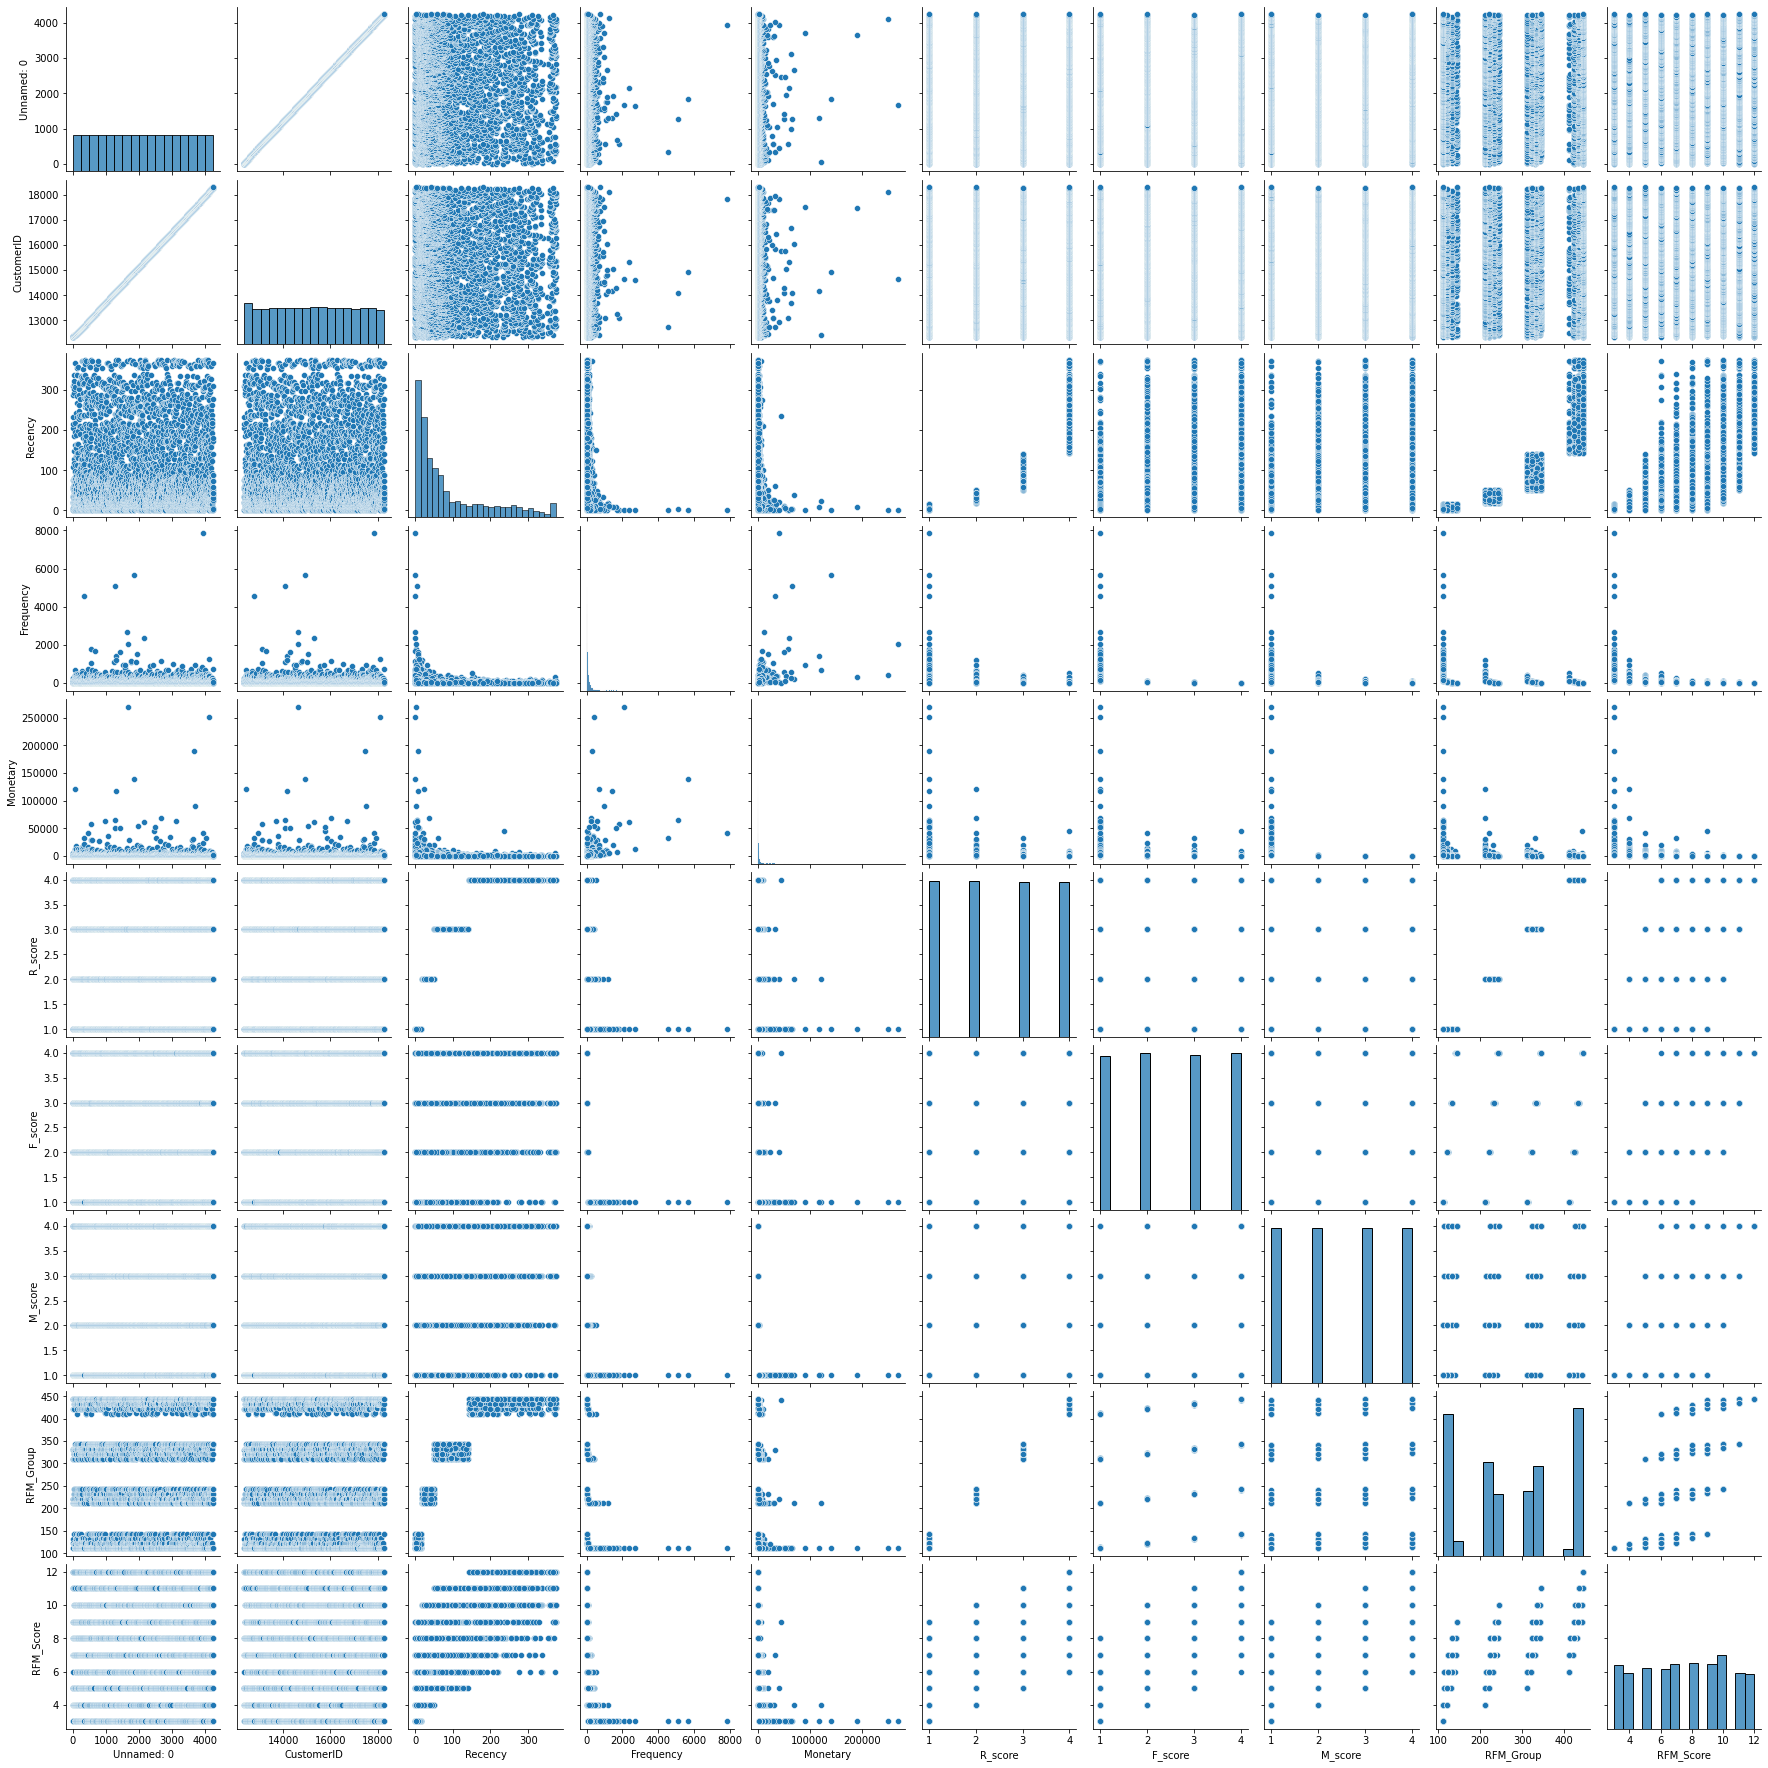

In [16]:
sns.pairplot(RFM_data)